In [42]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import seaborn as sns
import torch 
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


## MLP Class

In [43]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size, activations):
        super(MLP, self).__init__()
        layers = []
        layer_sizes = [input_size] + hidden_sizes + [output_size]
        for i in range(len(layer_sizes) - 1):
            layers.append(nn.Linear(layer_sizes[i], layer_sizes[i+1]))
            if i < len(activations):
                layers.append(activations[i])
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

## Dataset and model

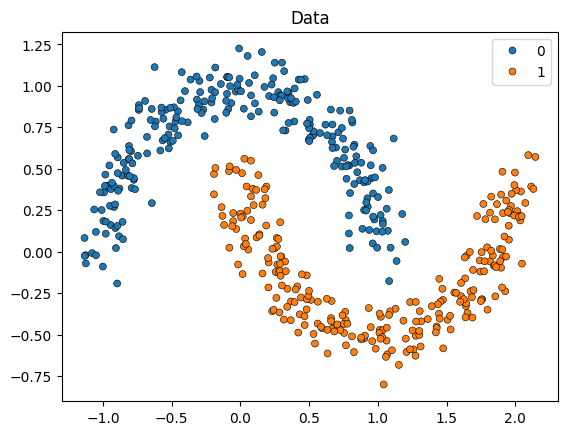

In [44]:

points, labels = make_moons(n_samples=500, shuffle=True, noise=0.1, random_state=0)

sns.scatterplot(
    x=points[:, 0], y=points[:, 1], hue=labels, marker="o", s=25, edgecolor="k", legend=True
).set_title("Data")
plt.show()

X = torch.from_numpy(points).to(dtype=torch.float32)
y = torch.from_numpy(labels).to(dtype=torch.float32).clone().detach().requires_grad_(True)
y = torch.tensor(labels, dtype=torch.long)

input_size = X.shape[1]
hidden_sizes = [64, 32]
output_size = 2
activations = [nn.ReLU(), nn.ReLU6()]

model = MLP(input_size, hidden_sizes, output_size, activations)

## Dataloader, loss & optimizer

In [45]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

dataset = TensorDataset(X, y)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

## Training loop

Epoch 1, Loss: 0.6342123746871948
Epoch 2, Loss: 0.380532443523407
Epoch 3, Loss: 0.37860897183418274
Epoch 4, Loss: 0.2488292157649994
Epoch 5, Loss: 0.2558255195617676
Epoch 6, Loss: 0.2844931185245514
Epoch 7, Loss: 0.15717951953411102
Epoch 8, Loss: 0.041059933602809906
Epoch 9, Loss: 0.23663429915905
Epoch 10, Loss: 0.08713119477033615
Epoch 11, Loss: 0.20731182396411896
Epoch 12, Loss: 0.07933692634105682
Epoch 13, Loss: 0.07893949002027512
Epoch 14, Loss: 0.08064810931682587
Epoch 15, Loss: 0.08564604818820953
Epoch 16, Loss: 0.07036744058132172
Epoch 17, Loss: 0.12493739277124405
Epoch 18, Loss: 0.049359772354364395
Epoch 19, Loss: 0.10542495548725128
Epoch 20, Loss: 0.03870192542672157
Epoch 21, Loss: 0.041869327425956726
Epoch 22, Loss: 0.1087513118982315
Epoch 23, Loss: 0.01715352013707161
Epoch 24, Loss: 0.02215990610420704
Epoch 25, Loss: 0.047127172350883484
Epoch 26, Loss: 0.023689525201916695
Epoch 27, Loss: 0.02728673815727234
Epoch 28, Loss: 0.021656330674886703
Epoch

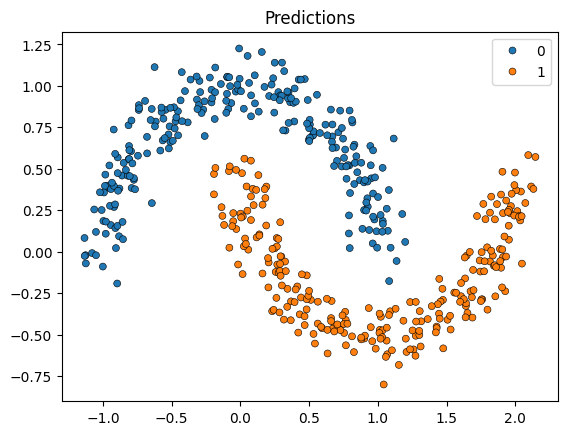

In [46]:
num_epochs = 100
for epoch in range(num_epochs):
    for inputs, targets in dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

predictions = torch.argmax(model(X), dim=1).detach().numpy()

sns.scatterplot(
    x=points[:, 0], y=points[:, 1], hue=predictions, marker="o", s=25, edgecolor="k", legend=True
).set_title("Predictions")
plt.show()
